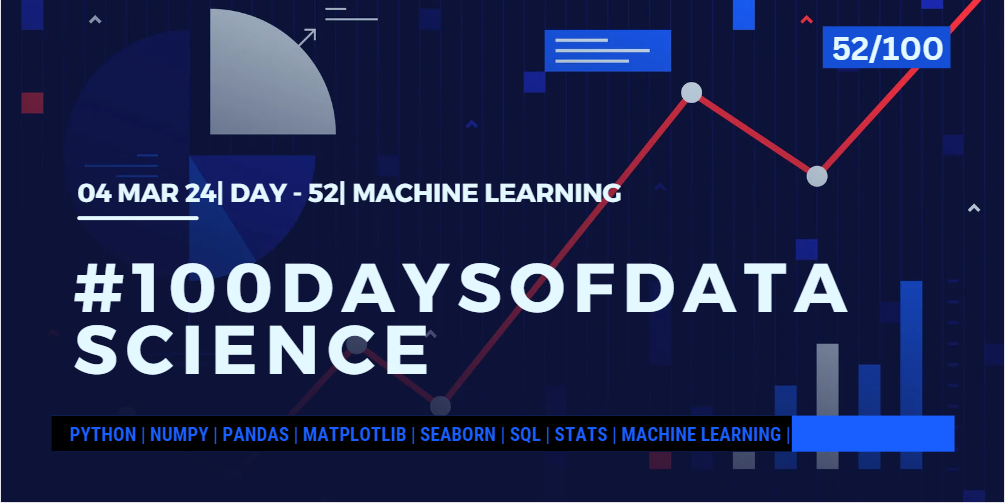

# <center>Gradient Boosting<center><hr style="border:4.5px solid #108999"></hr>

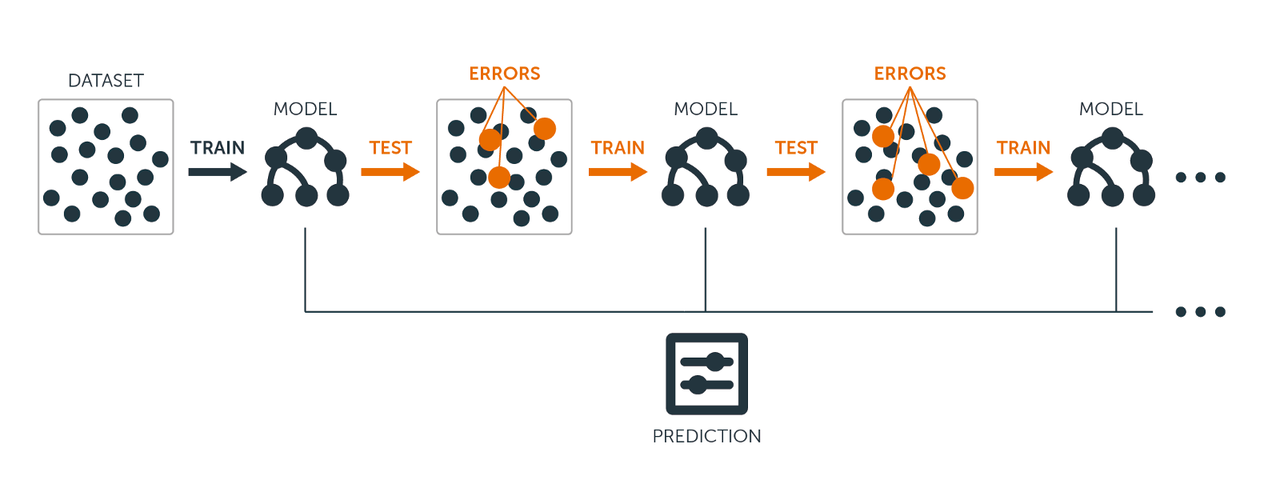

* Gradient Boosting is a powerful ensemble technique that builds a model in a stage-wise fashion. 
* Similar to Random Forests, it leverages the power of multiple models (often decision trees) to create a robust ensemble. However, unlike Random Forests, Gradient Boosting takes a sequential approach.
* Instead of training models independently, Gradient Boosting trains each model to focus on the errors made by the previous ones.   
* Imagine a group of students studying together, where each student corrects the mistakes of their peers. Gradient Boosting operates similarly – each subsequent model learns from the shortcomings of the previous one, progressively improving the overall accuracy of the ensemble.
* Gradient Boosting utilizes a technique called gradient descent to identify areas where the ensemble is performing poorly. It then focuses the next model on these areas to minimize the overall error. This iterative process ensures that the ensemble continuously learns and improves its predictive capabilities.
* <b>Advantages</b>
    - <b>Improved Accuracy:</b> By focusing on errors, Gradient Boosting can achieve higher accuracy compared to individual models.
    - <b>Flexibility:</b> Gradient boosting can handle various tasks, including classification and regression, with appropriate loss functions.
    - <b>Interpretability:</b> While not as interpretable as single decision trees, Gradient boosting allows some feature importance analysis through techniques like SHAP values.
* <b>Disadvantages</b>
    - <b>Overfitting Potential:</b> If not carefully controlled, Gradient Boosting can still be susceptible to overfitting the training data.
    - <b>Computational Cost:</b> Training can be computationally expensive due to the sequential model building process.
    - <b>Tuning Hyperparameters:</b> Gradient Boosting has several hyperparameters that require careful tuning for optimal performance.
    
* <b>Stochastic Gradient Boosting: A Scalable Variant</b>
Stochastic Gradient Boosting (often abbreviated as XGBoost) is a popular variant of Gradient Boosting that introduces a layer of randomness. It uses a subset of the data (mini-batch) for training each model, making it more efficient and scalable for handling large datasets.

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 52\kidney_disease.csv',header=0)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape ### Checking Shape

(400, 26)

In [4]:
df.describe() ### Get information of the Dataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
df.columns ### Checking Columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.isnull().sum() ### Checking Null Values in the Data

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df1 = pd.DataFrame.copy(df)
df1.shape

(400, 26)

In [9]:
### Dropping id column
df1.drop('id', axis = 1, inplace = True)

In [10]:
### Renaming columns
df1.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
### Dropping diabetes_mellitus column
df1.drop('diabetes_mellitus', axis = 1, inplace = True)


In [12]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'age': array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])}
{'blood_pressure': array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])}
{'specific_gravity': array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])}
{'albumin': array([ 1.,  4.,  2.,  3.,  0., nan,  5.])}
{'sugar': array([ 0.,  3.,  4.,  1., nan,  2.,  5.])}
{'red_blood_cells': array([nan, 'normal', 'abnormal'], dtype=object)}
{'pus_cell': array(['normal', 'abnormal', nan], dtype=object)}
{'pus_cell_clumps': array(['notpresent', 'present', nan], dtype=object)}
{'bacteria': array(['notpresent', 'present', nan], dtype=object)}
{'blood_glucose

In [13]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 11 numerical variables

The numerical variables are : ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']


In [14]:
# looking at unique values in numerical columns
for col in colname_num:
    print(f"{col} has {df1[col].unique()} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values

albumin has [ 1.  4.  2.  3.  0. nan  5.] values

sugar has [ 0.  3.  4.  1. nan  2.  5.] values

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 

In [15]:
### Finding categorical variables
colname_cat = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname_cat)))
print('The categorical variables are :', colname_cat)

There are 13 categorical variables

The categorical variables are : ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [16]:
### Converting necessary columns to numerical type
df1['packed_cell_volume'] = pd.to_numeric(df1['packed_cell_volume'], errors='coerce')
df1['white_blood_cell_count'] = pd.to_numeric(df1['white_blood_cell_count'], errors='coerce')
df1['red_blood_cell_count'] = pd.to_numeric(df1['red_blood_cell_count'], errors='coerce')
df1.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [17]:
# looking at unique values in categorical columns
for col in colname_cat:
    print(f"{col} has {df1[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.] values

white_blood_cell_count has [ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  410

In [18]:
### Cleaning categorical columns

df1['coronary_artery_disease'] = df1['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df1['class'] = df1['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [19]:
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
colname_cat = [var for var in df1.columns if df1[var].dtype=='O']
print(colname_cat)
print(colname_num)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


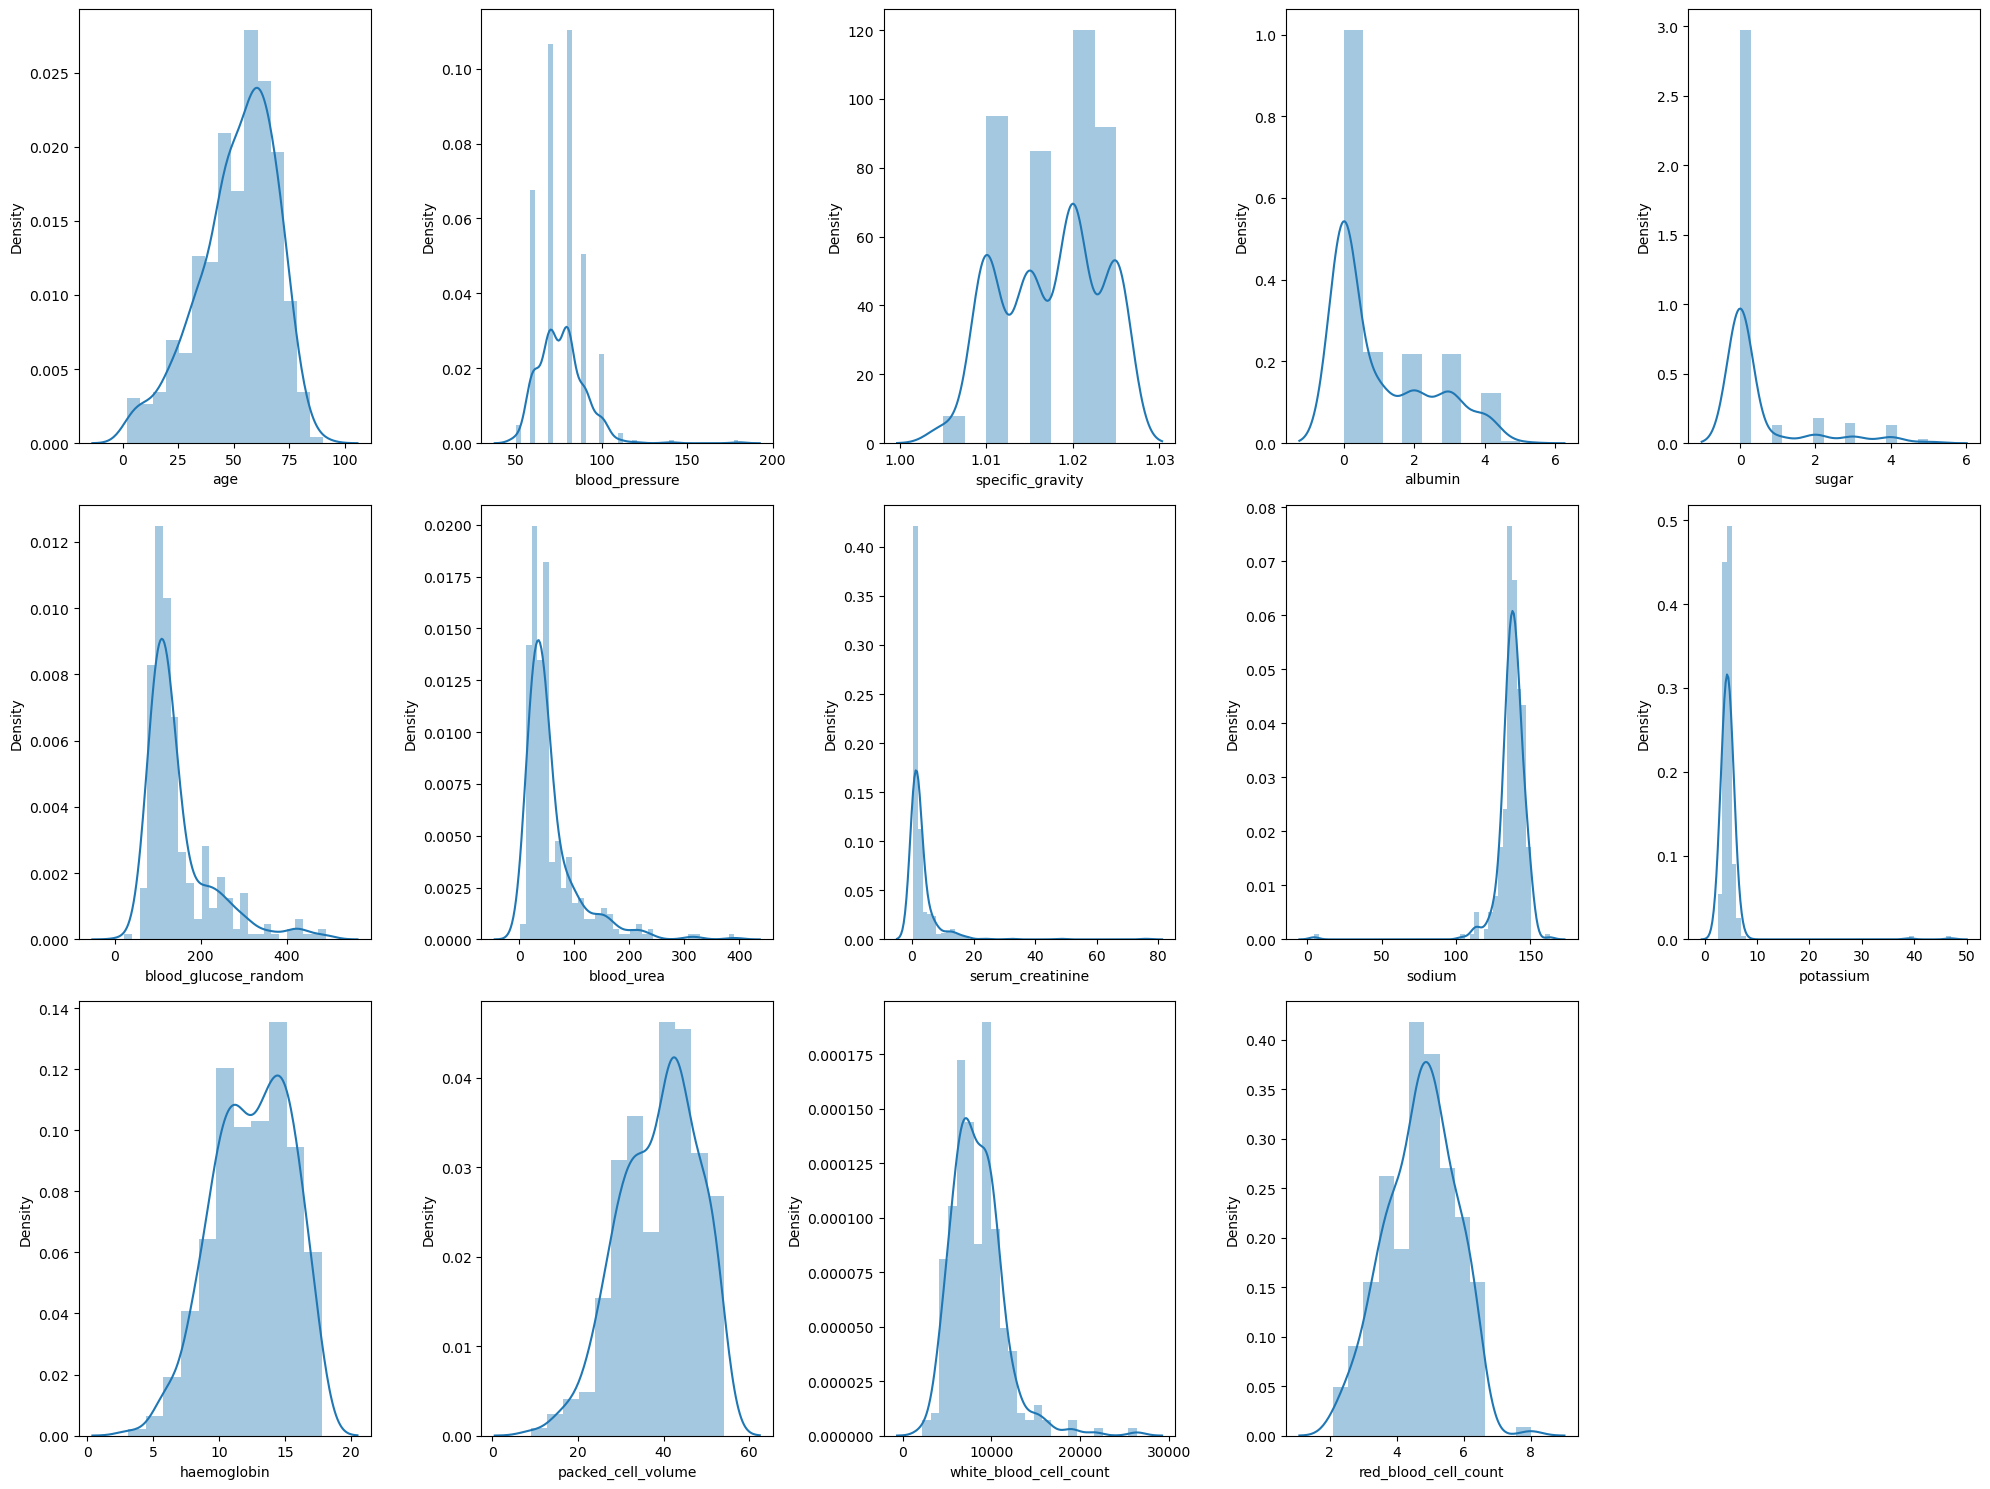

In [20]:
### Checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in colname_num:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
df2 = df1.copy()
df2.shape

(400, 24)

In [22]:
df2.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [23]:
for i in colname_num:
    print("Column Names: ", i)
    print("Null Values: ", df2[i].isna().sum())
    print("Mean Values: ",df2[i].mean())
    print("Median Values: ",df2[i].median())
    print("Mode Values: ",df2[i].mode())
    print('-' * 50)

Column Names:  age
Null Values:  9
Mean Values:  51.48337595907928
Median Values:  55.0
Mode Values:  0    60.0
Name: age, dtype: float64
--------------------------------------------------
Column Names:  blood_pressure
Null Values:  12
Mean Values:  76.46907216494846
Median Values:  80.0
Mode Values:  0    80.0
Name: blood_pressure, dtype: float64
--------------------------------------------------
Column Names:  specific_gravity
Null Values:  47
Mean Values:  1.0174079320113314
Median Values:  1.02
Mode Values:  0    1.02
Name: specific_gravity, dtype: float64
--------------------------------------------------
Column Names:  albumin
Null Values:  46
Mean Values:  1.0169491525423728
Median Values:  0.0
Mode Values:  0    0.0
Name: albumin, dtype: float64
--------------------------------------------------
Column Names:  sugar
Null Values:  49
Mean Values:  0.45014245014245013
Median Values:  0.0
Mode Values:  0    0.0
Name: sugar, dtype: float64
------------------------------------------

In [24]:
df2['age'] = df2['age'].fillna(df2['age'].median())
df2['blood_pressure'] = df2['blood_pressure'].fillna(df2['blood_pressure'].median())
df2['specific_gravity'] = df2['specific_gravity'].fillna(df2['specific_gravity'].median())
df2['albumin'] = df2['albumin'].fillna(df2['albumin'].mean())
df2['sugar'] = df2['sugar'].fillna(df2['sugar'].mean())
df2['blood_glucose_random'] = df2['blood_glucose_random'].fillna(df2['blood_glucose_random'].median())
df2['blood_urea'] = df2['blood_urea'].fillna(df2['blood_urea'].mean())
df2['serum_creatinine'] = df2['serum_creatinine'].fillna(df2['serum_creatinine'].mean())
df2['sodium'] = df2['sodium'].fillna(df2['sodium'].mean())
df2['potassium'] = df2['potassium'].fillna(df2['potassium'].mean())
df2['haemoglobin'] = df2['haemoglobin'].fillna(df2['haemoglobin'].mean())
df2['packed_cell_volume'] = df2['packed_cell_volume'].fillna(df2['packed_cell_volume'].mean())
df2['white_blood_cell_count'] = df2['white_blood_cell_count'].fillna(df2['white_blood_cell_count'].median())
df2['red_blood_cell_count'] = df2['red_blood_cell_count'].fillna(df2['red_blood_cell_count'].median())
df2.isna().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
for i in colname_cat:
    print("Column Names: ", i)
    print("Unique : ", df2[i].unique())
    print("Null Values: ", df2[i].isna().sum())
    print("Mode Values: ",df2[i].mode())
    print('-' * 50)

Column Names:  red_blood_cells
Unique :  [nan 'normal' 'abnormal']
Null Values:  152
Mode Values:  0    normal
Name: red_blood_cells, dtype: object
--------------------------------------------------
Column Names:  pus_cell
Unique :  ['normal' 'abnormal' nan]
Null Values:  65
Mode Values:  0    normal
Name: pus_cell, dtype: object
--------------------------------------------------
Column Names:  pus_cell_clumps
Unique :  ['notpresent' 'present' nan]
Null Values:  4
Mode Values:  0    notpresent
Name: pus_cell_clumps, dtype: object
--------------------------------------------------
Column Names:  bacteria
Unique :  ['notpresent' 'present' nan]
Null Values:  4
Mode Values:  0    notpresent
Name: bacteria, dtype: object
--------------------------------------------------
Column Names:  hypertension
Unique :  ['yes' 'no' nan]
Null Values:  2
Mode Values:  0    no
Name: hypertension, dtype: object
--------------------------------------------------
Column Names:  coronary_artery_disease
Unique

In [26]:
df2['red_blood_cells'] = df2['red_blood_cells'].fillna(df2['red_blood_cells'].mode()[0])
df2['pus_cell'] = df2['pus_cell'].fillna(df2['pus_cell'].mode()[0])
df2['pus_cell_clumps'] = df2['pus_cell_clumps'].fillna(df2['pus_cell_clumps'].mode()[0])
df2['bacteria'] = df2['bacteria'].fillna(df2['bacteria'].mode()[0])
df2['hypertension'] = df2['hypertension'].fillna(df2['hypertension'].mode()[0])
df2['coronary_artery_disease'] = df2['coronary_artery_disease'].fillna(df2['coronary_artery_disease'].mode()[0])
df2['appetite'] = df2['appetite'].fillna(df2['appetite'].mode()[0])
df2['peda_edema'] = df2['peda_edema'].fillna(df2['peda_edema'].mode()[0])
df2['aanemia'] = df2['aanemia'].fillna(df2['aanemia'].mode()[0])
df2.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [27]:
### Converting all categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname_cat:
    df2[x]=le.fit_transform(df2[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature",x)
    print("Mapping", le_name_mapping)

Feature red_blood_cells
Mapping {'abnormal': 0, 'normal': 1}
Feature pus_cell
Mapping {'abnormal': 0, 'normal': 1}
Feature pus_cell_clumps
Mapping {'notpresent': 0, 'present': 1}
Feature bacteria
Mapping {'notpresent': 0, 'present': 1}
Feature hypertension
Mapping {'no': 0, 'yes': 1}
Feature coronary_artery_disease
Mapping {'no': 0, 'yes': 1}
Feature appetite
Mapping {'good': 0, 'poor': 1}
Feature peda_edema
Mapping {'no': 0, 'yes': 1}
Feature aanemia
Mapping {'no': 0, 'yes': 1}
Feature class
Mapping {'ckd': 0, 'not ckd': 1}


In [28]:
df2.head(15)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.000000,0.000000,1,1,0,0,121.0,...,15.4,44.000000,7800.0,5.2,1,0,0,0,0,0
1,7.0,50.0,1.020,4.000000,0.000000,1,1,0,0,121.0,...,11.3,38.000000,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.000000,3.000000,1,1,0,0,423.0,...,9.6,31.000000,7500.0,4.8,0,0,1,0,1,0
3,48.0,70.0,1.005,4.000000,0.000000,1,0,1,0,117.0,...,11.2,32.000000,6700.0,3.9,1,0,1,1,1,0
4,51.0,80.0,1.010,2.000000,0.000000,1,1,0,0,106.0,...,11.6,35.000000,7300.0,4.6,0,0,0,0,0,0
5,60.0,90.0,1.015,3.000000,0.000000,1,1,0,0,74.0,...,12.2,39.000000,7800.0,4.4,1,0,0,1,0,0
6,68.0,70.0,1.010,0.000000,0.000000,1,1,0,0,100.0,...,12.4,36.000000,8000.0,4.8,0,0,0,0,0,0
7,24.0,80.0,1.015,2.000000,4.000000,1,0,0,0,410.0,...,12.4,44.000000,6900.0,5.0,0,0,0,1,0,0
8,52.0,100.0,1.015,3.000000,0.000000,1,0,1,0,138.0,...,10.8,33.000000,9600.0,4.0,1,0,0,0,1,0
9,53.0,90.0,1.020,2.000000,0.000000,0,0,1,0,70.0,...,9.5,29.000000,12100.0,3.7,1,0,1,0,1,0


In [42]:
for col in df2.columns:
    print(f"{col} has {df2[col].nunique()} categories\n")

age has 76 categories

blood_pressure has 10 categories

specific_gravity has 5 categories

albumin has 7 categories

sugar has 7 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

blood_glucose_random has 146 categories

blood_urea has 119 categories

serum_creatinine has 85 categories

sodium has 35 categories

potassium has 41 categories

haemoglobin has 116 categories

packed_cell_volume has 43 categories

white_blood_cell_count has 89 categories

red_blood_cell_count has 45 categories

hypertension has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [43]:
df3 = df2.copy()
df3.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'class'],
      dtype='object')

In [44]:
### Spliting Data into X and y
X = df3.values[:,:-1]
y = df3.values[:,1]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (400, 23)
*************
y: (400,)


In [45]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[-0.21003135  0.25421378  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [-2.62723421 -1.97247624  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [ 0.615355    0.25421378 -1.4210744  ...  1.96927621 -0.4843221
   2.38047614]
 ...
 [-2.33245337  0.25421378  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [-2.03767254 -1.23024623  1.3427656  ... -0.50780078 -0.4843221
  -0.42008403]
 [ 0.37953033  0.25421378  1.3427656  ... -0.50780078 -0.4843221
  -0.42008403]]


In [46]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [47]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (320, 23)
X_test:  (80, 23)
y_train:  (320,)
y_test:  (80,)


In [48]:
#importing model
from sklearn.ensemble import GradientBoostingClassifier
#create a model object
model_gbc = GradientBoostingClassifier()
#train the model object
model_gbc.fit(X_train,y_train)
#predict using the model
y_pred = model_gbc.predict(X_test)
print(y_pred)

[ 70  80  60  70  70  80  90  80  90  90  70  80  70  80 100  60  80  90
  80  70  80  80  80  80  80  90  70  80  80  60  50  70  70  80  70  70
  60  80  90  80  90  80  70  80  70  50  80  90  80  70  60 100  80 120
  70  80  80 110  60  90  80 100  80  60  90  60  90  80  90  70  60  60
 120  90  90  80  80  60  80  70]


In [49]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,0,1,2,3,4,5,6,7,8,9
0,2,0,0,0,0,0,0,0,0,0
1,0,11,0,0,0,0,0,0,0,0
2,0,0,17,0,0,0,0,0,0,0
3,0,0,0,30,0,0,0,0,0,0
4,0,0,0,0,14,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0


In [50]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
Classification report: 
              precision    recall  f1-score   support

          50       1.00      1.00      1.00         2
          60       1.00      1.00      1.00        11
          70       1.00      1.00      1.00        17
          80       1.00      1.00      1.00        30
          90       1.00      1.00      1.00        14
         100       1.00      1.00      1.00         3
         110       1.00      1.00      1.00         1
         120       0.00      0.00      0.00         0
         140       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         1

    accuracy                           0.97        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.97      0.97      0.97        80

Accuracy of the model:  0.975


In [51]:
#create a model object
model_sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
#train the model object
model_sgb.fit(X_train,y_train)
#predict using the model
y_pred = model_sgb.predict(X_test)
print(y_pred)

[ 70  80  60  70  70  80  90  80  90  90  70  80  70  80 100  60  80  90
  80  70  80  80  80  80  80  90  70  80  80  60  50  70  70  80  70  70
  60  80  90  80  90  80  70  80  70  50  80  90  80  70  60 100  80 120
  70  80  80 110  60  90  80 100  80  60  90  60  90  80  90  70  60  60
 120  90  90  80  80  60  80  70]


In [52]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,0,1,2,3,4,5,6,7,8,9
0,2,0,0,0,0,0,0,0,0,0
1,0,11,0,0,0,0,0,0,0,0
2,0,0,17,0,0,0,0,0,0,0
3,0,0,0,30,0,0,0,0,0,0
4,0,0,0,0,14,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0


In [53]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

          50       1.00      1.00      1.00         2
          60       1.00      1.00      1.00        11
          70       1.00      1.00      1.00        17
          80       1.00      1.00      1.00        30
          90       1.00      1.00      1.00        14
         100       1.00      1.00      1.00         3
         110       1.00      1.00      1.00         1
         120       0.00      0.00      0.00         0
         140       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         1

    accuracy                           0.97        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.97      0.97      0.97        80

Accuracy of the model:  0.975


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>